## Análise de conflitos de terra permanentes e emergentes em cidades de fronteira do Brasil

In [27]:
import pandas as pd
import numpy as np

#### Recarregar histórico de conflitos finalizado

In [3]:
history = pd.read_excel('Resultados/histórico-conflitos-atualizado.xlsx')

#### Extrair série temporal por cidade

In [116]:
ts = history.set_index('id')[[
    'CONF2000', 'CONF2001', 'CONF2002', 'CONF2003', 'CONF2004', 'CONF2005',
    'CONF2006', 'CONF2007', 'CONF2008', 'CONF2009', 'CONF2010', 'CONF2011',
    'CONF2012', 'CONF2013', 'CONF2014', 'CONF2015', 'CONF2016', 'CONF2017',
    'CONF2018', 'CONF2019', 'CONF2020', 'CONF2021'
]]

ts.columns = [int(col[4:]) for col in ts.columns]

#### Contagem de cidades

In [117]:
print('Cidades:', len(history))

Cidades: 237


#### Cidade com conflitos na primeira década (2000 - 2010)

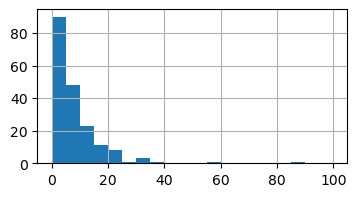

In [119]:
until_2010 = ts.loc[:, :2011].sum(1)
ax = until_2010[until_2010 != 0].hist(bins=np.arange(0, 101, 5), figsize=(4, 2))

#### Cidade com conflitos a partir da segunda década (2011 - 2022)

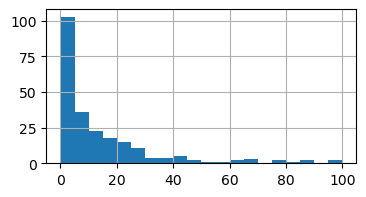

In [120]:
from_2011 = ts.loc[:, 2011:].sum(1)
ax = from_2011[from_2011 != 0].hist(bins=np.arange(0, 101, 5), figsize=(4, 2))

#### Fução para criar campos na tabela para representar a recorrência dos conflitos por município

In [171]:
def recurrence(_ids, permanent, emergent, finished):
    categories = []
    
    for _id in _ids:
        if _id in permanent:
            categories.append("PERMANENTE")
        elif _id in emergent:
            categories.append("EMERGENTE")
        elif _id in finished:
            categories.append("ESTABILIZADO")
        else:
            categories.append("POUCOS CONFLITOS")
    
    return categories

def recurrence_analysis(df, year_middle=2011, min_conflicts=1):

    ts = df.set_index('id')[[
        'CONF2000', 'CONF2001', 'CONF2002', 'CONF2003', 'CONF2004', 'CONF2005',
        'CONF2006', 'CONF2007', 'CONF2008', 'CONF2009', 'CONF2010', 'CONF2011',
        'CONF2012', 'CONF2013', 'CONF2014', 'CONF2015', 'CONF2016', 'CONF2017',
        'CONF2018', 'CONF2019', 'CONF2020', 'CONF2021'
    ]]
    
    ts.columns = [int(col[4:]) for col in ts.columns]

    until_year_middle = ts.loc[:, :year_middle].sum(1)
    from_year_middle = ts.loc[:, year_middle:].sum(1)

    first_decade = until_year_middle[until_year_middle > min_conflicts]
    from_second_decade = from_year_middle[from_year_middle > min_conflicts]

    # print()
    print(f'Municípios com mais de {min_conflicts} conflitos na primeira década:', first_decade.shape[0])
    print(f'Municípios com mais de {min_conflicts} conflitos na segunda década:', from_second_decade.shape[0])

    permanent = list(set(first_decade.index).intersection(from_second_decade.index))
    emergent = list(set(from_second_decade.index).difference(first_decade.index))
    finished = list(set(first_decade.index).difference(from_second_decade.index))

    return permanent, emergent, finished

#### Contagems de municípios com conflitos permanentes e emergentes

In [172]:
for min_conflicts in [10, 5, 1]:
    print(min_conflicts)
    permanent, emergent, finished = recurrence_analysis(history, year_middle=2011, min_conflicts=min_conflicts)
    
    history[f'RECORRENCIA-{min_conflicts}'] = recurrence(history['id'], permanent, emergent, finished)
    
    print()
    print(history[f'RECORRENCIA-{min_conflicts}'].value_counts().to_dict())
    print()
    

10
Municípios com mais de 10 conflitos na primeira década: 45
Municípios com mais de 10 conflitos na segunda década: 88

{'POUCOS CONFLITOS': 140, 'EMERGENTE': 52, 'PERMANENTE': 36, 'ESTABILIZADO': 9}

5
Municípios com mais de 5 conflitos na primeira década: 84
Municípios com mais de 5 conflitos na segunda década: 130

{'POUCOS CONFLITOS': 97, 'PERMANENTE': 74, 'EMERGENTE': 56, 'ESTABILIZADO': 10}

1
Municípios com mais de 1 conflitos na primeira década: 150
Municípios com mais de 1 conflitos na segunda década: 211

{'PERMANENTE': 139, 'EMERGENTE': 72, 'POUCOS CONFLITOS': 15, 'ESTABILIZADO': 11}

